In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# CX Kaggle Competition: Salary Prediction

### Table of Contents

* [1. Data Loading](#loading)
* [2. Exploring the Features](#features)
* [3. Exploring the ```Salary``` Response](#response)
* [4. Relationships between Features and Response](#relations)

### Hosted by and maintained by the [Students Association of Applied Statistics (SAAS)](https://saas.berkeley.edu). Authored by Ritvik Iyer and Derek Cai. 

<span id="loading"></span>

## Data Loading 

**Question 1:** Let's load our training and test sets using Pandas' ```pd.read_csv``` function. Fill in the following two lines with code which loads the ```train.csv``` and ```test.csv``` data sets. 

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
display(train.head())
print(f'The columns in the data frame are: {list(train.columns)[1:]}')

Unnamed: 0           timestamp          company              level  \
0           0  3/28/2021 15:48:22  Ernst and Young  Senior Consultant   
1           1   4/3/2021 18:41:29         Deloitte     Senior Manager   
2           2   2/2/2021 13:05:18           Amazon                 L4   
3           3   7/19/2021 1:37:17           Oracle               IC-2   
4           4  3/29/2021 21:27:36          Wayfair                 L3   

                   title  totalyearlycompensation          location  \
0  Management Consultant                   135000       Atlanta, GA   
1  Management Consultant                   216000     Baltimore, MD   
2      Software Engineer                   192000      New York, NY   
3      Software Engineer                   235000  Redwood City, CA   
4      Software Engineer                   177000        Boston, MA   

   yearsofexperience  yearsatcompany                             tag  ...  \
0                2.0             0.0     Data & Analytics Consulting  ...   
1               15.0             4.0                         General  ...   
2                2.0             0.0      API Development (Back-End)  ...   
3                1.0             1.0  Distributed Systems (Back-End)  ...   
4                9.0             0.0      API Development (Back-End)  ...   

   Doctorate_Degree  Highschool Some_College Race_Asian  Race_White  \
0                 0           0            0          0           0   
1                 0           0            0          0           0   
2                 0           0            0          0           1   
3                 0           0            0          1           0   
4                 0           0            0          1           0   

   Race_Two_Or_More  Race_Black  Race_Hispanic      Race          Education  
0                 0           0              1  Hispanic    Master's Degree  
1                 0           0              0       NaN                NaN  
2                 0           0              0     White  Bachelor's Degree  
3                 0           0              0     Asian    Master's Degree  
4                 0           0              0     Asian  Bachelor's Degree  

[5 rows x 27 columns]

The columns in the data frame are: ['timestamp', 'company', 'level', 'title', 'totalyearlycompensation', 'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree', 'Highschool', 'Some_College', 'Race_Asian', 'Race_White', 'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education']


**Question 2:** Now, we want to create a combined data set for the first step in our EDA process. Use Pandas' ```pd.concat``` function to append the rows of the training and test data sets together. 

In [3]:
combined = pd.concat([train, test], axis=0)
combined.head()

Unnamed: 0           timestamp          company              level  \
0           0  3/28/2021 15:48:22  Ernst and Young  Senior Consultant   
1           1   4/3/2021 18:41:29         Deloitte     Senior Manager   
2           2   2/2/2021 13:05:18           Amazon                 L4   
3           3   7/19/2021 1:37:17           Oracle               IC-2   
4           4  3/29/2021 21:27:36          Wayfair                 L3   

                   title  totalyearlycompensation          location  \
0  Management Consultant                 135000.0       Atlanta, GA   
1  Management Consultant                 216000.0     Baltimore, MD   
2      Software Engineer                 192000.0      New York, NY   
3      Software Engineer                 235000.0  Redwood City, CA   
4      Software Engineer                 177000.0        Boston, MA   

   yearsofexperience  yearsatcompany                             tag  ...  \
0                2.0             0.0     Data & Analytics Consulting  ...   
1               15.0             4.0                         General  ...   
2                2.0             0.0      API Development (Back-End)  ...   
3                1.0             1.0  Distributed Systems (Back-End)  ...   
4                9.0             0.0      API Development (Back-End)  ...   

   Doctorate_Degree  Highschool Some_College Race_Asian  Race_White  \
0                 0           0            0          0           0   
1                 0           0            0          0           0   
2                 0           0            0          0           1   
3                 0           0            0          1           0   
4                 0           0            0          1           0   

   Race_Two_Or_More  Race_Black  Race_Hispanic      Race          Education  
0                 0           0              1  Hispanic    Master's Degree  
1                 0           0              0       NaN                NaN  
2                 0           0              0     White  Bachelor's Degree  
3                 0           0              0     Asian    Master's Degree  
4                 0           0              0     Asian  Bachelor's Degree  

[5 rows x 27 columns]

<span id="features"></span>

## Exploring the Features

**Question 3:** Use the ```combined``` dataframe to visualize the distributions of two quantitative features of your choice. 

*Hint: What is a good visualization chart for a quantitative variable?*

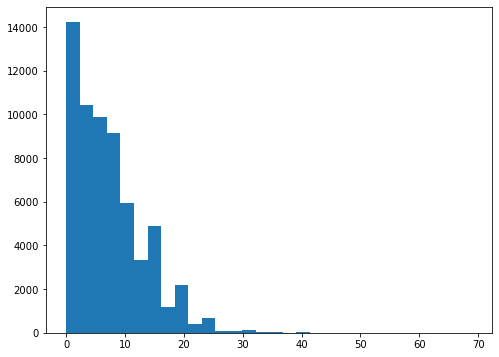

In [4]:
# Generate visualization #1 

plt.figure(figsize=(8, 6))
plt.hist(combined['yearsofexperience'], bins=30);

**Interpretation:** This is a right-tailed distribution, where most workers have years of experience between 0 and 10. 

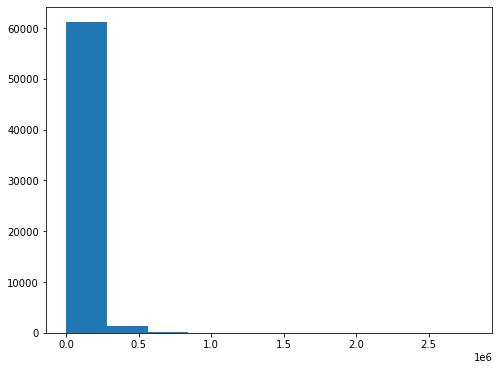

In [5]:
# Generate visualization #2 

plt.figure(figsize=(8, 6))
plt.hist(combined['stockgrantvalue'], bins=10);

**Interpretation:** Another right-tailed distribution here, which makes sense because most companies do not provide stock-based compensation. 

**Question 4:** Use the Pandas' function ```df.describe()``` to generate summary statistics for the features available in the combined data set. 

In [6]:
combined.describe()

Unnamed: 0  totalyearlycompensation  yearsofexperience  \
count  62642.000000             5.011300e+04       62642.000000   
mean   21297.420006             2.161279e+05           7.204135   
std    15051.350908             1.393194e+05           5.840375   
min        0.000000             1.000000e+04           0.000000   
25%     7830.000000             1.350000e+05           3.000000   
50%    18791.500000             1.880000e+05           6.000000   
75%    34451.750000             2.620000e+05          10.000000   
max    50112.000000             4.980000e+06          69.000000   

       yearsatcompany  stockgrantvalue           bonus        cityid  \
count    62642.000000     6.264200e+04    62642.000000  62642.000000   
mean         2.702093     5.148608e+04    19334.746588   9856.201989   
std          3.263656     8.187457e+04    26781.292040   6679.104563   
min          0.000000     0.000000e+00        0.000000      0.000000   
25%          0.000000     0.000000e+00     1000.000000   7369.000000   
50%          2.000000     2.500000e+04    14000.000000   7839.000000   
75%          4.000000     6.500000e+04    26000.000000  11521.000000   
max         69.000000     2.800000e+06  1000000.000000  47926.000000   

       Masters_Degree  Bachelors_Degree  Doctorate_Degree    Highschool  \
count    62642.000000      62642.000000      62642.000000  62642.000000   
mean         0.245698          0.201223          0.028783      0.005108   
std          0.430504          0.400917          0.167196      0.071291   
min          0.000000          0.000000          0.000000      0.000000   
25%          0.000000          0.000000          0.000000      0.000000   
50%          0.000000          0.000000          0.000000      0.000000   
75%          0.000000          0.000000          0.000000      0.000000   
max          1.000000          1.000000          1.000000      1.000000   

       Some_College    Race_Asian    Race_White  Race_Two_Or_More  \
count  62642.000000  62642.000000  62642.000000      62642.000000   
mean       0.005667      0.187925      0.128221          0.012835   
std        0.075067      0.390655      0.334338          0.112562   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000      0.000000      0.000000          0.000000   
50%        0.000000      0.000000      0.000000          0.000000   
75%        0.000000      0.000000      0.000000          0.000000   
max        1.000000      1.000000      1.000000          1.000000   

         Race_Black  Race_Hispanic  
count  62642.000000   62642.000000  
mean       0.011015       0.018039  
std        0.104373       0.133094  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max        1.000000       1.000000

**Interpretation:** The most common race is 'Asian', with 18.8% of the workers falling into that category. It looks like the workers have generally high education levels. 

**Question 5:** How correlated are the ```yearsatcompany``` and ```stockgrantvalue``` features in the ```combined``` data set? Interpret this correlation in words. 

*Hint: Use ```np.corrcoef(...)``` to calculate the value of $r$, the correlation coefficient.*

In [7]:
r = np.corrcoef(combined['yearsatcompany'], combined['stockgrantvalue'])
print(f'The value of the correlation coefficient was: {r[0, 1]}')

The value of the correlation coefficient was: 0.08949233055576707


**Answer:** There is a weak, positive correlation between the number of years at a company and the stock grant value provided. They don't seem to be linearly related by much. 

**Question 6:** Use the ```combined``` dataframe to visualize the counts of two categorical features of your choice. 


*Hint: What is a good visualization chart for a categorical variable?*

In [8]:
combined['Education'].value_counts().reset_index()

index  Education
0    Master's Degree      15391
1  Bachelor's Degree      12601
2                PhD       1703
3       Some College        355
4         Highschool        320

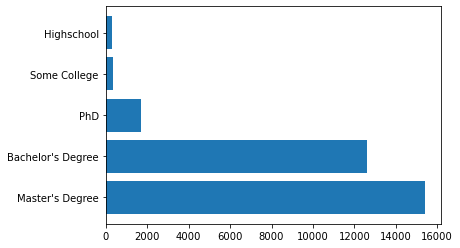

In [9]:
# Generate visualization #1 

education_counts = combined['Education'].value_counts().reset_index()
plt.barh(education_counts['index'], education_counts['Education']);

**Interpretation:** Most common education level (which we have data for) is a Master's degree. 

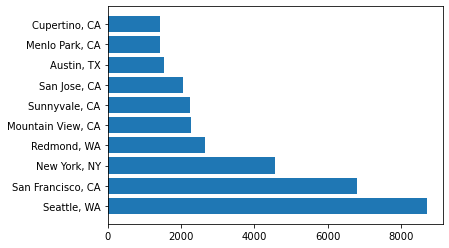

In [10]:
# Generate visualization #2

location_counts = combined['location'].value_counts().reset_index().sort_values('location', ascending=False).iloc[0:10]
plt.barh(location_counts['index'], location_counts['location']);

**Interpretation:** Looks like this is a data set highly biased towards technology companies, seeing as the cities are mostly tech hubs. 

<span id="response"></span>

## Exploring the Salary Response

Now, we will restrict our EDA to the training set in order to investigate trends in the response variable. 

**Question 7:** Create a histogram displaying the distribution of salaries in the training set. 

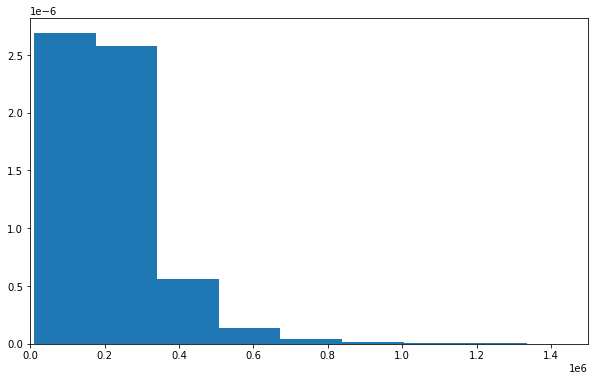

In [11]:
# Generate a histogram of salaries here 

plt.figure(figsize=(10, 6))
plt.xlim(0, 1.5e6)
plt.hist(train['totalyearlycompensation'], bins=30, density=True);

**Question 8:** In the training set, we are provided the ```timestamp``` feature, which gives us a rough idea of when each entry was recorded in the data set. Let's extract the year from each timestamp and create a new column in the training set with this information. Fill in the line of code below, where you will need to use ```pd.DatetimeIndex``` on the ```timestamp``` column to extract the year. 

In [12]:
train['year'] = pd.DatetimeIndex(train['timestamp']).year

**Question 9:** Create a scatter plot to display the relationship between ```year``` and ```totalyearlycompensation```. 

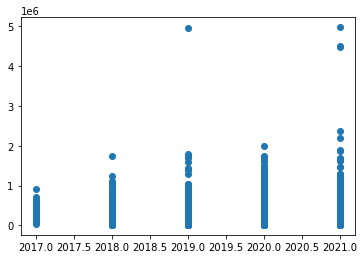

In [13]:
# Generate a scatterplot of salary vs. year here 

plt.scatter(train['year'], train['totalyearlycompensation']);

<span id="relations"></span>

## Relationships between Features and Response

In the following questions, we'll look at the relationships between some features and the response variable. 

**Question 10:** Create a horizontal bar plot of the top 10 average salaries by ```company```. 

*Hint: You'll need to group the data frame first, then extract the relevant columns.*

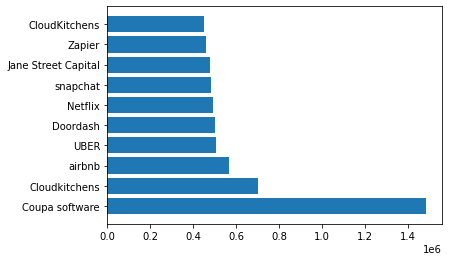

In [14]:
top_position_salary = train.groupby('company').agg(np.mean)[['totalyearlycompensation']].reset_index().sort_values('totalyearlycompensation', ascending=False).iloc[0:10, :]
plt.barh(top_position_salary['company'], top_position_salary['totalyearlycompensation']); 

**Question 11:** Create a horizontal bar plot of the 10 lowest average salaries by ```location```. 

*Hint: You can take a similar approach to Q10, but you will need to sort the data frame in the opposite way.*

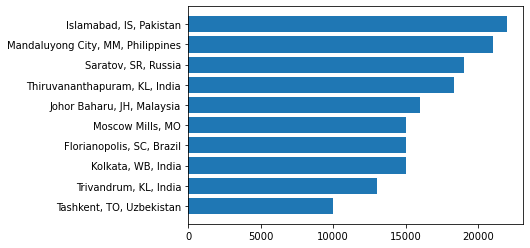

In [15]:
bot_location_salary = train.groupby('location').agg(np.mean)[['totalyearlycompensation']].reset_index().sort_values('totalyearlycompensation').iloc[0:10, :]
plt.barh(bot_location_salary['location'], bot_location_salary['totalyearlycompensation']); 

**Question 12:** Create a horizontal bar plot of the average salary by ```Education``` level. 

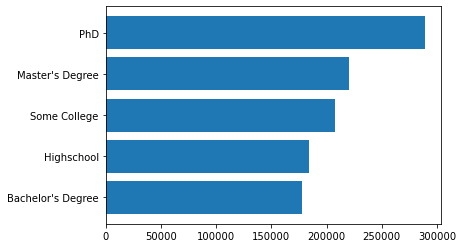

In [16]:
education_salary = train.groupby('Education').agg(np.mean)[['totalyearlycompensation']].reset_index().sort_values('totalyearlycompensation')
plt.barh(education_salary['Education'], education_salary['totalyearlycompensation']); 

Now, let's explore the relationships between quantitative features and the response variable. 

**Question 13:** Create a scatter plot to show the relationship between ```yearsofexperience``` and the average ```totalyearlycompensation``` by year. Overlay the line of best fit onto the scatter plot. 

*Hint: You'll need to group the data frame first before plotting. To overlay the line of best fit, use ```np.polyfit``` with the appropriate inputs.*

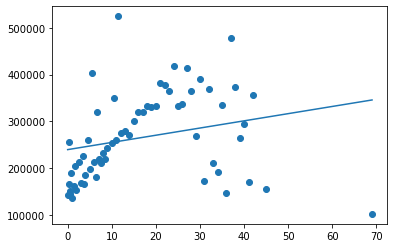

In [17]:
yoe_salary = train[['yearsofexperience', 'totalyearlycompensation']]
yoe_salary_means = yoe_salary.groupby('yearsofexperience').mean().reset_index()
m, b = np.polyfit(yoe_salary_means['yearsofexperience'], yoe_salary_means['totalyearlycompensation'], 1) 
plt.scatter(yoe_salary_means['yearsofexperience'], yoe_salary_means['totalyearlycompensation'])
plt.plot(yoe_salary_means['yearsofexperience'], m * yoe_salary_means['yearsofexperience'] + b);

**Question 14:** Whew! We've done a lot of plotting and interpretation. Based on what you've seen so far, which features do you think are promising in terms of predicting yearly compensation? 

**Answer:** This is a subjective question and there are multiple right answers!